<h1>Logistic Regression </h1>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier



In [2]:
# Load the dataset
data = pd.read_csv('../data/final_data.csv')
data.head()

,activity_id,heart_rate,IMU_hand_temp,IMU_hand_acc_x_sc16,IMU_hand_acc_y_sc16,IMU_hand_acc_z_sc16,IMU_hand_gyro_x,IMU_hand_gyro_y,IMU_hand_gyro_z,IMU_hand_mag_x,...,IMU_ankle_temp,IMU_ankle_acc_x_sc16,IMU_ankle_acc_y_sc16,IMU_ankle_acc_z_sc16,IMU_ankle_gyro_x,IMU_ankle_gyro_y,IMU_ankle_gyro_z,IMU_ankle_mag_x,IMU_ankle_mag_y,IMU_ankle_mag_z
0,0,-0.277411,-1.324439,1.148824,0.680922,0.501724,-0.004677,-0.002266,-0.004980,-0.513054,...,-2.711549,0.050575,-0.218933,0.682796,-0.006258,0.013808,-0.002437,-1.608949,-1.764234,-3.837308
1,0,-0.277411,-1.324439,1.161110,0.592976,0.541436,-0.129991,-0.014920,-0.003975,-0.485710,...,-2.711549,0.044306,-0.223684,0.653335,0.009692,0.058704,-0.000324,-1.597148,-1.739155,-3.837105
2,0,-0.277411,-1.324439,1.160940,0.516025,0.561338,-0.179927,-0.029838,0.002510,-0.507881,...,-2.711549,0.044108,-0.228549,0.643587,-0.040245,-0.024899,-0.005733,-1.567120,-1.714462,-3.849604
3,0,-0.277411,-1.324439,1.149257,0.516206,0.580514,-0.145904,-0.021640,0.010356,-0.471262,...,-2.711549,0.039110,-0.218872,0.682600,-0.037691,0.027704,0.010081,-1.590226,-1.775264,-3.812459
4,0,-0.277411,-1.324439,1.162568,0.532876,0.629362,-0.053622,-0.060732,0.004856,-0.503634,...,-2.711549,0.056278,-0.223870,0.682953,-0.007639,-0.019348,-0.006452,-1.559669,-1.776173,-3.812702


In [3]:
y = data['activity_id']
X =  data.drop('activity_id', axis = 1)

In [4]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Perform Grid Search with CV for logisic regression

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],                    # Regularization strength
    'penalty': ['l2'],                    # Regularization type
    'solver': ['lbfgs'],                  # Solver supporting l2 and none penalties
    'max_iter': [1000],                   # Maximum iterations
    'class_weight': [None, 'balanced']    # Adjust weights for imbalanced classes
}


log_reg  = LogisticRegression()

# Perform grid search with cross-validation
lr_grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)


# Display the best parameters and corresponding accuracy
print("Best Parameters:", lr_grid_search.best_params_)
print("Best Cross-Validation Accuracy:", lr_grid_search.best_score_)

Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.8212754707321569


In [22]:
# Training the logistic regression model with the best parameters

log_reg_model = LogisticRegression(max_iter=1000,C=1, class_weight=None, penalty='l2', solver='lbfgs')
log_reg_model.fit(X_train, y_train)



LogisticRegression(C=1, max_iter=1000)

In [23]:
# Make predictions
y_pred_lr = log_reg_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

log_reg_accuracy = accuracy_score(y_test,y_pred_lr)
print(f"Accuracy Score for logistice regression : {log_reg_accuracy*100:.3f} %")


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     38505
           1       0.90      0.89      0.89     37038
           2       0.84      0.83      0.83     37986
           3       0.79      0.88      0.83     47752
           4       0.75      0.74      0.75     19640
           5       0.93      0.93      0.93     32920
           6       0.75      0.76      0.76     37621
           7       0.62      0.55      0.58     23443
           8       0.60      0.49      0.54     20989
           9       0.79      0.82      0.81     35071
          10       0.88      0.91      0.89     47738
          11       0.78      0.66      0.72      9872

    accuracy                           0.82    388575
   macro avg       0.80      0.79      0.79    388575
weighted avg       0.82      0.82      0.82    388575

Accuracy Score for logistice regression : 82.142 %


<h1> Support Vector Machines<h1>

In [50]:
#We have chosen the rbf kernel because our dataset involves sensor readings like heart rate, gyroscope, and accelerometer values, which have nonlinear relationships.
#RBF can effectively capture such complexities.

svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)


SVC()

In [52]:
y_pred_svm = svm.predict(X_test)


In [53]:
# Calculate Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

# Generate Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.9953754101524802
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38505
           1       1.00      0.99      0.99     37038
           2       0.98      1.00      0.99     37986
           3       1.00      1.00      1.00     47752
           4       1.00      1.00      1.00     19640
           5       1.00      1.00      1.00     32920
           6       1.00      1.00      1.00     37621
           7       0.99      0.99      0.99     23443
           8       0.99      0.99      0.99     20989
           9       1.00      1.00      1.00     35071
          10       1.00      0.99      0.99     47738
          11       1.00      1.00      1.00      9872

    accuracy                           1.00    388575
   macro avg       0.99      1.00      1.00    388575
weighted avg       1.00      1.00      1.00    388575




Confusion Matrix:



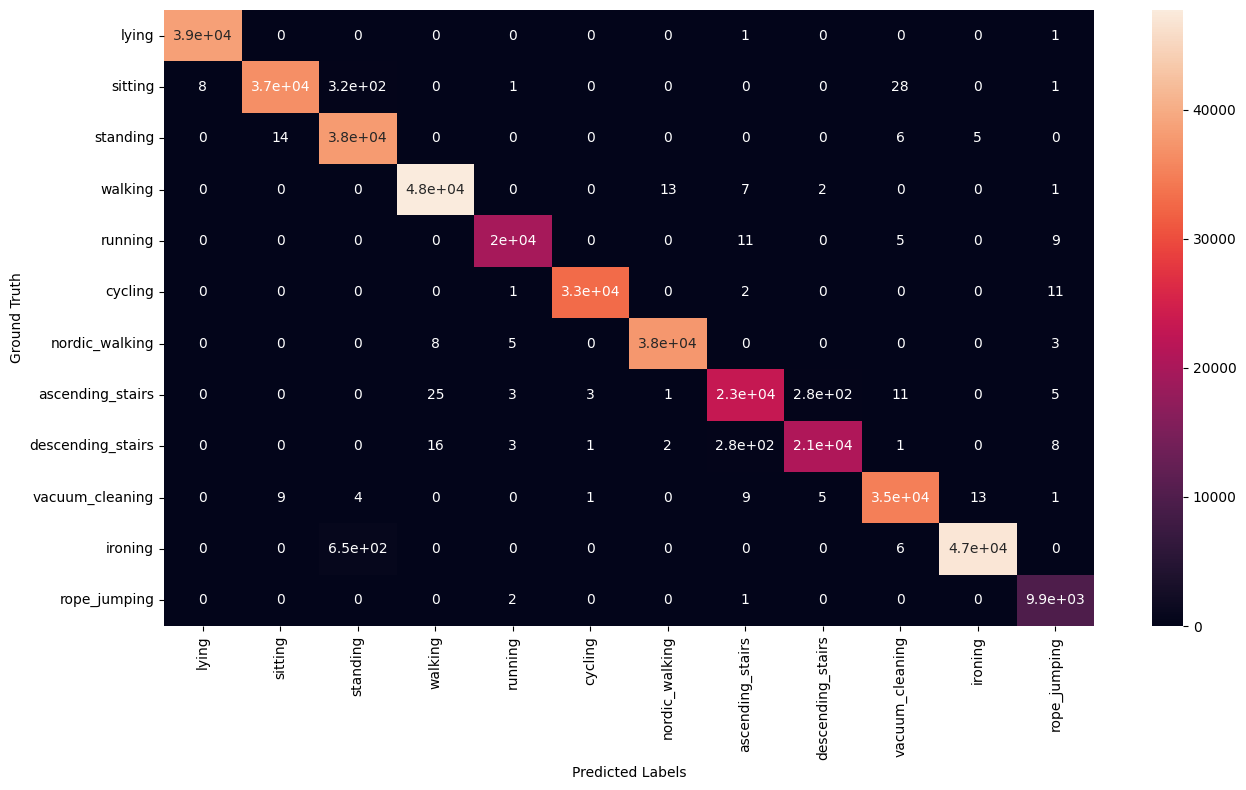

In [55]:
# Generate Confusion Matrix

activity_map = {0:'lying',1:'sitting',2:'standing',3:'walking',4:'running',5:'cycling',6:'nordic_walking',
                7:'ascending_stairs',8:'descending_stairs',9:'vacuum_cleaning',10:'ironing',11:'rope_jumping'}

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:\n")
class_names = [activity_map[i] for i in range(len(activity_map))]
plt.figure(figsize=(15, 8))
sns.heatmap(cm_svm, annot=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Ground Truth')
plt.show()


<h1> Decision Trees </h1>

In [35]:
decisionTree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                        param_grid=[{"max_depth":np.arange(1,10)}],
                                        return_train_score=True)

In [36]:
decisionTree_grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             return_train_score=True)

In [56]:
best_max_depth = decisionTree_grid.best_estimator_.get_params()['max_depth']
best_max_depth

np.int64(9)

In [57]:
decisionTree_model = DecisionTreeClassifier(random_state=42, max_depth=best_max_depth)
decisionTree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=np.int64(9), random_state=42)

In [58]:
y_pred_dt = decisionTree_model.predict(X_test)

In [59]:
# Calculate Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

# Generate Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.8629170687769414
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     38505
           1       0.97      0.95      0.96     37038
           2       0.93      0.93      0.93     37986
           3       0.83      0.90      0.87     47752
           4       0.87      0.79      0.83     19640
           5       0.95      0.84      0.89     32920
           6       0.87      0.90      0.88     37621
           7       0.49      0.61      0.54     23443
           8       0.67      0.57      0.62     20989
           9       0.82      0.88      0.85     35071
          10       0.94      0.89      0.92     47738
          11       0.82      0.83      0.82      9872

    accuracy                           0.86    388575
   macro avg       0.85      0.84      0.84    388575
weighted avg       0.87      0.86      0.86    388575



In [61]:
print("Feature importances for decision tree : ")

important_features_dt = decisionTree_model.feature_importances_
importance_dt = pd.DataFrame({'FeatureNames':X.columns, 'Importances':important_features_dt})
importance_dt.sort_values(by = 'Importances')

Feature importances for decision tree : 


,FeatureNames,Importances
26,IMU_ankle_gyro_y,0.000000
25,IMU_ankle_gyro_x,0.000000
5,IMU_hand_gyro_x,0.000000
6,IMU_hand_gyro_y,0.000000
24,IMU_ankle_acc_z_sc16,0.000000
17,IMU_chest_gyro_z,0.000000
23,IMU_ankle_acc_y_sc16,0.000000
15,IMU_chest_gyro_x,0.000002
12,IMU_chest_acc_x_sc16,0.000005
29,IMU_ankle_mag_y,0.000472


<h1> Random Forests </h1>

In [39]:
randomForest_model= RandomForestClassifier(random_state=42, n_estimators=100)
randomForest_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred_rf = randomForest_model.predict(X_test)


In [47]:
# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forests model :", accuracy_rf)



Accuracy for Random Forests model : 0.9998610306890562


In [48]:
important_features = randomForest_model.feature_importances_
importance = pd.DataFrame({'FeatureNames':X.columns, 'Importances':important_features})
importance.sort_values(by = 'Importances')

,FeatureNames,Importances
15,IMU_chest_gyro_x,0.002272
5,IMU_hand_gyro_x,0.002589
17,IMU_chest_gyro_z,0.003159
26,IMU_ankle_gyro_y,0.004565
24,IMU_ankle_acc_z_sc16,0.005703
25,IMU_ankle_gyro_x,0.005716
6,IMU_hand_gyro_y,0.006230
12,IMU_chest_acc_x_sc16,0.007788
7,IMU_hand_gyro_z,0.009180
23,IMU_ankle_acc_y_sc16,0.010243


### XG Boost

In [44]:
xgboost_model = XGBClassifier(random_state=42, n_estimators=100)
xgboost_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
y_pred_xgb = xgboost_model.predict(X_test)


In [46]:
# Calculate Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy for XG Boost model :", accuracy_xgb)

Accuracy for XG Boost model : 0.9998507366660233


In [60]:
important_features_xgb = xgboost_model.feature_importances_
importance_xgb = pd.DataFrame({'FeatureNames':X.columns, 'Importances':important_features_xgb})
importance_xgb.sort_values(by = 'Importances')

,FeatureNames,Importances
15,IMU_chest_gyro_x,0.000388
5,IMU_hand_gyro_x,0.000465
17,IMU_chest_gyro_z,0.000842
6,IMU_hand_gyro_y,0.001054
26,IMU_ankle_gyro_y,0.001878
24,IMU_ankle_acc_z_sc16,0.002889
29,IMU_ankle_mag_y,0.007404
12,IMU_chest_acc_x_sc16,0.007497
22,IMU_ankle_acc_x_sc16,0.007590
9,IMU_hand_mag_y,0.007908


<h1> Neural Network </h1>

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization


ModuleNotFoundError: No module named 'distutils'

In [ ]:
data = pd.read_csv('../data/final_data.csv')

In [ ]:
y=data['activity_id']

In [ ]:
print(y.shape)
print(data.shape)

(1936481,)
(1936481, 32)


In [ ]:
x = data.drop('activity_id', axis=1)
y = data['activity_id']

In [ ]:
y.head()

,activityID
2928,lying
2929,lying
2930,lying
2931,lying
2932,lying


In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y,num_classes=12)

In [ ]:
y_stratify = np.argmax(y, axis=1)
x_dev, x_test, y_dev, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y_stratify)

In [ ]:
y_dev_stratify = np.argmax(y_dev, axis=1)
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size=0.3, random_state=42,stratify=y_dev_stratify)

In [ ]:
batch_size = [32,64]
batch_size_adam_models = []
batch_size_adam_accuracy = []
batch_size_adam_history = []

batch_size_sgd_models = []
batch_size_sgd_accuracy = []
batch_size_sgd_history = []

In [ ]:
for batch in batch_size:
 model_normal = Sequential()
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(64, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(12, activation='softmax'))
 model_normal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 model = model_normal.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=15, batch_size=batch)
 batch_size_adam_models.append(model_normal)
 batch_size_adam_accuracy.append(model.history['val_accuracy'][-1])
 batch_size_adam_history.append(model)

In [ ]:
for batch in batch_size:
 model_normal = Sequential()
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(64, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(12, activation='softmax'))
 model_normal.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
 model = model_normal.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=15, batch_size=batch)
 batch_size_sgd_models.append(model_normal)
 batch_size_sgd_accuracy.append(model.history['val_accuracy'][-1])
 batch_size_sgd_history.append(model)

In [ ]:
adam_index = np.argmax(batch_size_adam_accuracy)
best_adam_model = batch_size_adam_models[adam_index]
sgd_index = np.argmax(batch_size_sgd_accuracy)
best_sgd_model = batch_size_sgd_models[sgd_index]

if batch_size_adam_accuracy[adam_index] > batch_size_sgd_accuracy[sgd_index]:
  best_model = best_adam_model
else:
  best_model = best_sgd_model

In [ ]:
best_model

<Sequential name=sequential_1, built=True>

18155/18155 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step
Test Set Accuracy of the best model is : 0.9950

Confusion Matrix:



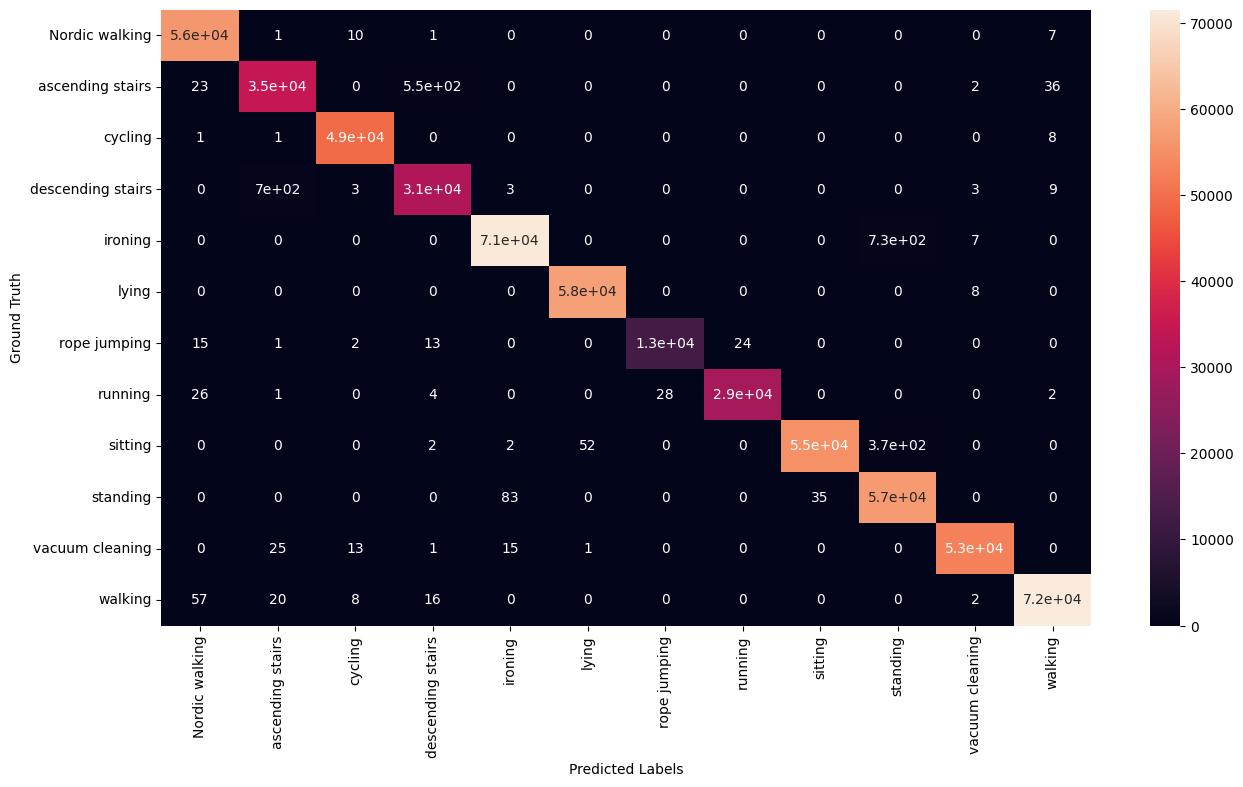


Classification Report:

              precision    recall  f1-score   support

           0     0.9978    0.9997    0.9988     56432
           1     0.9787    0.9827    0.9807     35165
           2     0.9993    0.9998    0.9995     49380
           3     0.9814    0.9771    0.9793     31483
           4     0.9985    0.9897    0.9941     71607
           5     0.9991    0.9999    0.9995     57757
           6     0.9978    0.9957    0.9968     12891
           7     0.9992    0.9979    0.9986     29460
           8     0.9994    0.9924    0.9958     55557
           9     0.9810    0.9979    0.9894     56979
          10     0.9996    0.9990    0.9993     52606
          11     0.9991    0.9986    0.9988     71628

    accuracy                         0.9950    580945
   macro avg     0.9942    0.9942    0.9942    580945
weighted avg     0.9950    0.9950    0.9950    580945



In [ ]:

y_test_pred_prob = best_model.predict(x_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_actual = np.argmax(y_test, axis=1)


accuracy = accuracy_score(y_test_actual, y_test_pred)
print(f"Test Set Accuracy of the best model is : {accuracy:.4f}")


cm = confusion_matrix(y_test_actual, y_test_pred)
print("\nConfusion Matrix:\n")
y_num = np.argmax(y, axis=1)
y_labels = label_encoder.inverse_transform(y_num)
class_names = np.unique(y_labels)
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Ground Truth')
plt.show()



print("\nClassification Report:\n")
print(classification_report(y_test_actual, y_test_pred,digits=4))
